In [1]:
import rasterio as rio
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
src = rio.open('/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/chelsa_v2/envicloud/chelsa/chelsa_V2/GLOBAL/climatologies/1981-2010/bio/CHELSA_bio1_1981-2010_V.2.1.tif')
src.crs

CRS.from_epsg(4326)

In [2]:
p_karst_df = gpd.read_file('carb_huc_dems/processed_hucs.shp')
p_karst_df_4326 = p_karst_df.to_crs("4326")


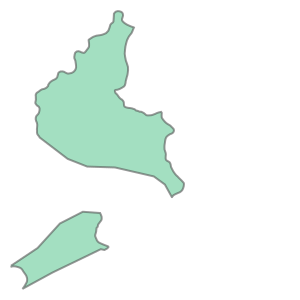

In [5]:
some_huc = p_karst_df.iloc[0]
some_huc.geometry

In [6]:
src.sample(some_huc.geometry)

<generator object sample_gen at 0x7fa1240d0040>

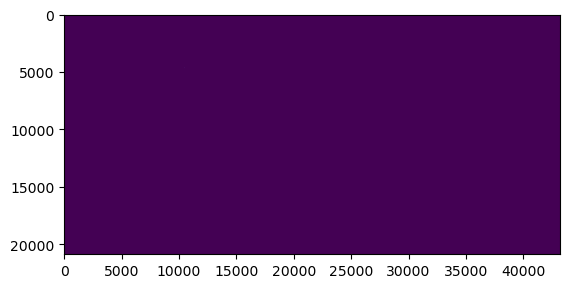

In [7]:
from rasterio import mask
m = mask.mask(src, [p_karst_df_4326.iloc[0].geometry])
plt.imshow(m[0][0])

In [3]:
from rasterstats import zonal_stats
import pandas as pd

with rio.open('/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/chelsa_v2/envicloud/chelsa/chelsa_V2/GLOBAL/climatologies/1981-2010/bio/CHELSA_bio1_1981-2010_V.2.1.tif') as src:
    affine = src.transform
    array = src.read(1)
    df_zonal_stats = pd.DataFrame(zonal_stats(p_karst_df_4326, array, affine=affine))

/home/mcoving/anaconda3/envs/geo_env/lib/python3.11/site-packages/rasterstats/io.py:328: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


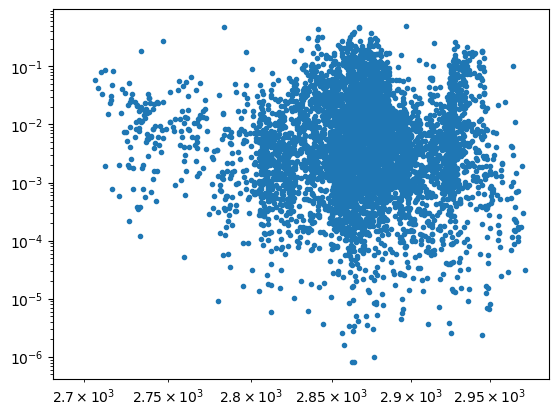

In [12]:
plt.loglog(df_zonal_stats['mean'], p_karst_df.p_karst, '.')

In [10]:
df_zonal_stats['mean']

0       2802.307692
1       2807.958333
2       2807.360000
3       2805.882353
4       2806.051282
           ...     
8755    2969.700000
8756    2935.429577
8757    2938.704918
8758    2936.686567
8759    2940.142012
Name: mean, Length: 8760, dtype: float64